<a href="https://colab.research.google.com/github/RaamVijith/Dengue_forecasting_MachineLearnig_Algorithms-/blob/main/DecisionTreeRegression_Dengue_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

%cd /mydrive/dataset/

df1 = pd.read_csv("Dengue_Data_colombo.csv")
df2 = pd.read_csv("timeseries_data_colombo.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 appsheet			  'IMG_E0085Lo Qulty.jpg'
 Classroom			  'IMG_E0087lo Qulty.jpg'
'Colab Notebooks'		  'Mini Project final presentation template(2022).pptx'
 CV_Ramalingam_Vijithan.pdf	  'My Drive'
 dataset			   Research
 IMG_20211006_1048181111sign.jpg
/content/gdrive/My Drive/dataset


In [15]:
dataset=pd.merge(df1,df2,left_on="Date",right_on="time")
dataset = dataset[['Date','Value','temperature_2m_mean','rain_sum','windspeed_10m_max']]
dataset['Date'] = pd.to_datetime(dataset['Date'])


In [16]:
# Sort the dataset by date if it's not already sorted
dataset = dataset.sort_values(by='Date')

# Extract the features and target variable
X = dataset[['temperature_2m_mean', 'rain_sum', 'windspeed_10m_max']]
y = dataset['Value']

In [17]:
# Split the data into training and testing sets
train_size = int(0.8 * len(dataset))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [18]:
# Create and train the Decision Tree Regression model
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

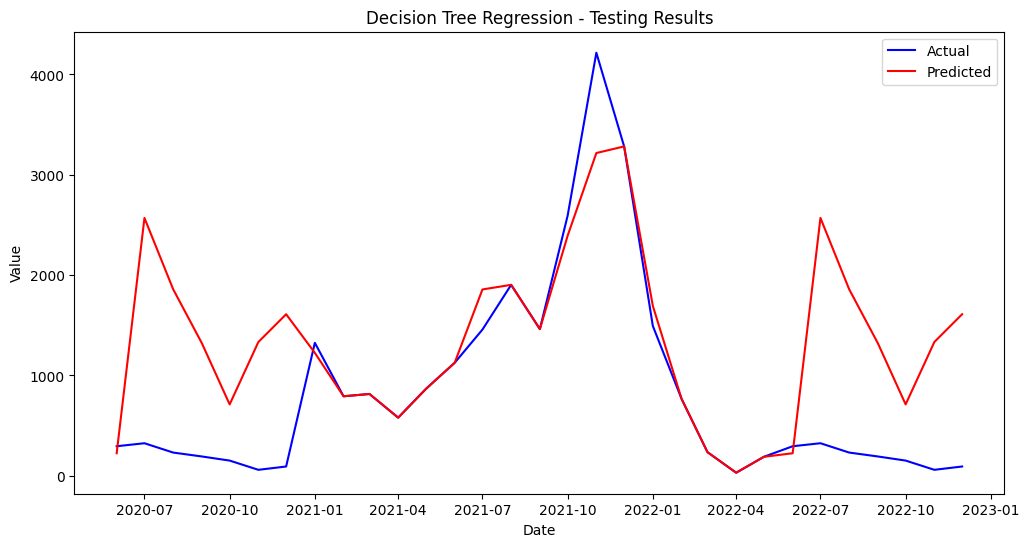

In [19]:
# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Create a graph for the testing results
plt.figure(figsize=(12, 6))
plt.plot(dataset['Date'][train_size:], y_test, label='Actual', color='blue')
plt.plot(dataset['Date'][train_size:], y_pred, label='Predicted', color='red')
plt.title('Decision Tree Regression - Testing Results')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


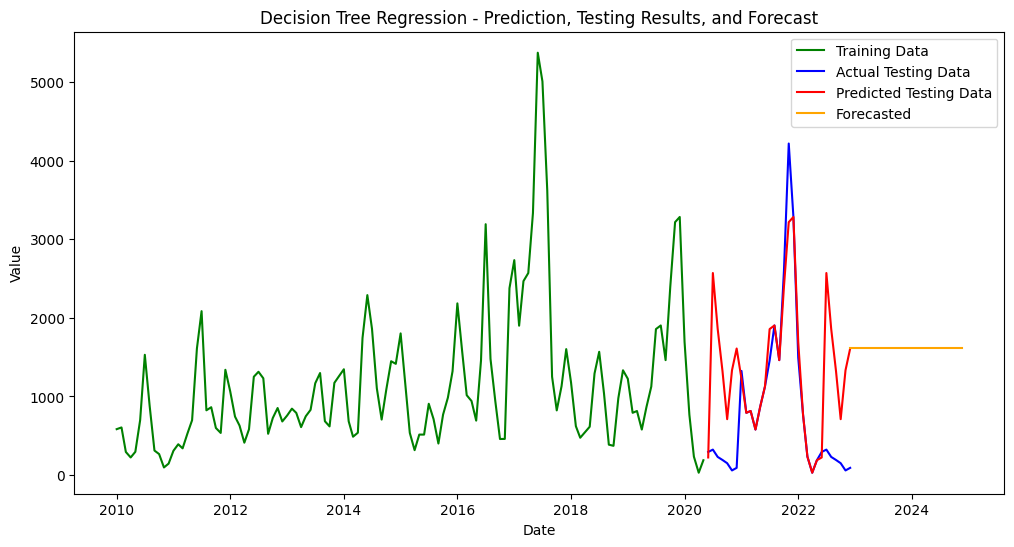

In [20]:
# Create a date range for forecasting (next 90 days)
last_date = dataset['Date'].max()
forecast_dates = [last_date + timedelta(days=i) for i in range(1, 721)]

# Forecast the values for the next 90 days
forecast_features = np.array([X.iloc[-1, :]] * 720)  # Use the last available features for forecasting
forecasted_values = regressor.predict(forecast_features)

# Create a graph for the 90-day forecasting
plt.figure(figsize=(12, 6))
plt.plot(dataset['Date'][:train_size], y_train, label='Training Data', color='green')
plt.plot(dataset['Date'][train_size:], y_test, label='Actual Testing Data', color='blue')
plt.plot(dataset['Date'][train_size:], y_pred, label='Predicted Testing Data', color='red')
plt.plot(forecast_dates, forecasted_values, label='Forecasted', color='orange')

plt.title('Decision Tree Regression - Prediction, Testing Results, and Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate predictions on the entire dataset
y_pred = regressor.predict(X)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate R-squared (R2) score
r2 = r2_score(y, y_pred)
print(f'R-squared (R2) Score: {r2:.2f}')


Mean Absolute Error (MAE): 121.75
Mean Squared Error (MSE): 179745.99
R-squared (R2) Score: 0.79
